# Figure 4 

Notebook to create plkots for figure 4

- A) Average pCO2misfit in the MPI and CNRM model for all years, December,January, and February (DJF); March, April and May (MAM); June, July, and August (JJA);and September October and November (SON). 
- B) Zonally average pCO2misfit in the MPI andCNRM models for DJF, JJA, MAM, and SON

In [1]:
# standard imports
import xarray as xr
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

# plotting
import matplotlib.pyplot as plt
import cmocean.cm as cm

# to make date in attributes
from datetime import date

# flux calc
#from wanninkhof92 import  wanninkhof92 as wann92
import air_sea_co2_exchange as ase

# plotting
import cmocean as cm
import matplotlib.pyplot as plt
from plotting_tools.spatial_map import SpatialMap
from plotting_tools.time_series_diagram import TimeSeriesPlot
from matplotlib.ticker import AutoMinorLocator
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature

In [2]:
#dir_raw = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/raw'
#dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'
dir_figs = '/home/gloege/projects/ldeo_hpd/reports/figures'

# Load data

In [3]:
ds = xr.open_dataset('/local/data/artemis/workspace/gloege/ldeo-hpd/LDEO-HPD_v20210425_1x1_198201-201812.nc')

In [4]:
list(ds.model.values)

['cesm',
 'cnrm',
 'csiro',
 'fesom',
 'ipsl',
 'mpi',
 'noresm',
 'planktom',
 'princeton']

# 1. Model error

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


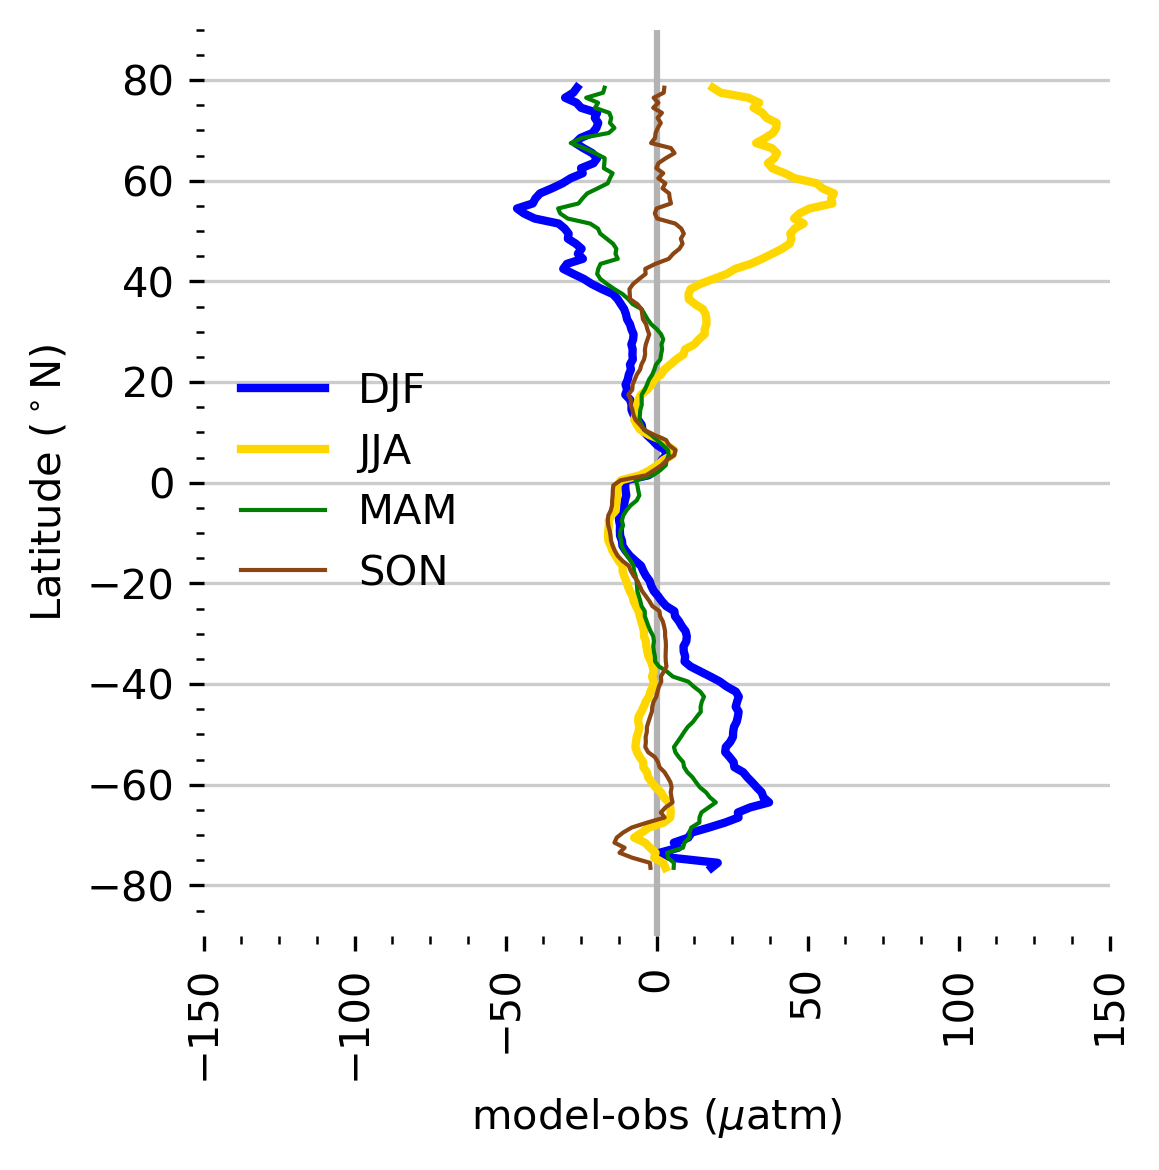

In [5]:
#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# 0 == MPI
model = 'cnrm'

plt.plot([0,0],[-90,90], color=[0.7,0.7,0.7])
# plot data
data = ds['error'].sel(model=model).groupby('time.season').mean('time').sel(season='DJF').mean('lon')
ax.plot(data, data['lat'], color='blue', linewidth=2, label='DJF')

data = ds['error'].sel(model=model).groupby('time.season').mean('time').sel(season='JJA').mean('lon')
ax.plot(data, data['lat'], color='gold', linewidth=2, label='JJA')

data = ds['error'].sel(model=model).groupby('time.season').mean('time').sel(season='MAM').mean('lon')
ax.plot(data, data['lat'], color='green', linewidth=1, label='MAM')

data = ds['error'].sel(model=model).groupby('time.season').mean('time').sel(season='SON').mean('lon')
ax.plot(data, data['lat'], color='saddlebrown',linewidth=1, label='SON')

# Range ov axes
ax.set_ylim([-90, 90])
ax.set_xlim([-150, 150])

# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
plt.setp(ax.get_xticklabels(), rotation=90)
### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
ax.set_ylabel(f'Latitude ($^\circ$N)')
ax.set_xlabel(f'model-obs ($\mu$atm)')

ax.legend(loc='center left', frameon=False)

#plt.savefig(f'{dir_figs}/misfit_zonal_{model}.pdf',
#            dpi=300,
#            transparent = True, 
#            bbox_inches = 'tight', 
#            pad_inches = 0)

# 2. Seasonal mean 

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  r

<Figure size 3120x2145 with 0 Axes>

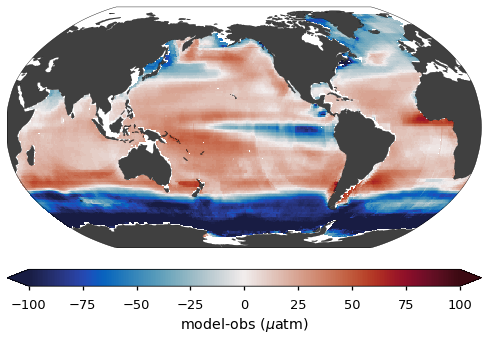

<Figure size 3120x2145 with 0 Axes>

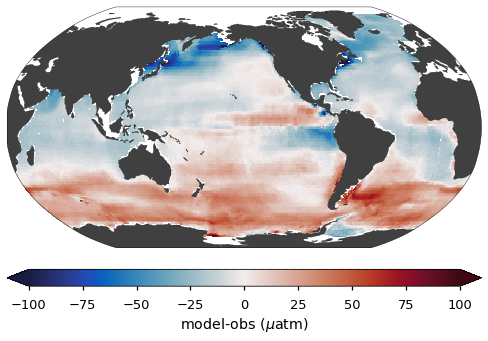

<Figure size 3120x2145 with 0 Axes>

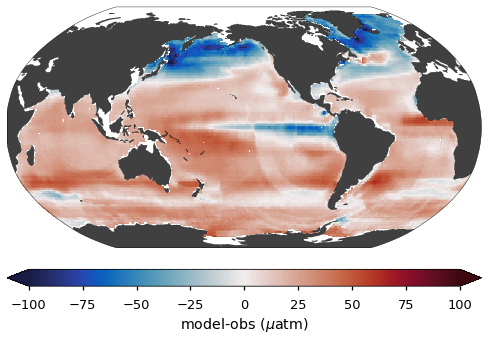

<Figure size 3120x2145 with 0 Axes>

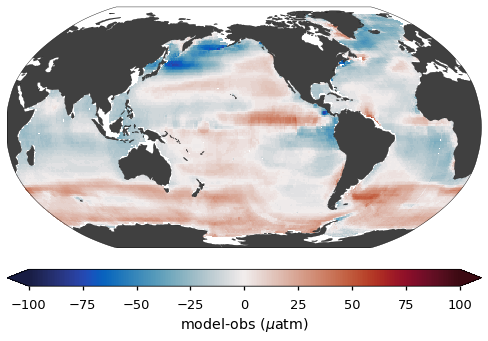

<Figure size 3120x2145 with 0 Axes>

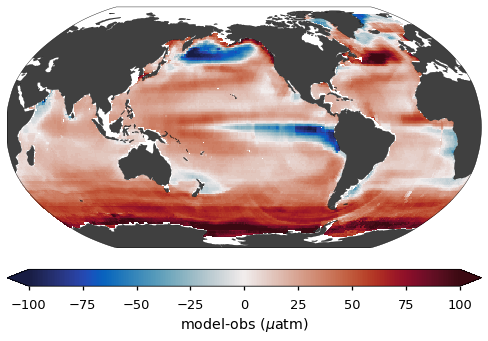

<Figure size 3120x2145 with 0 Axes>

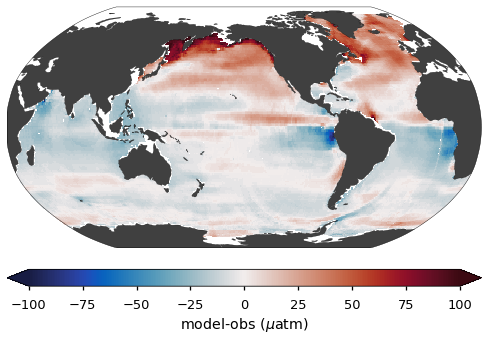

<Figure size 3120x2145 with 0 Axes>

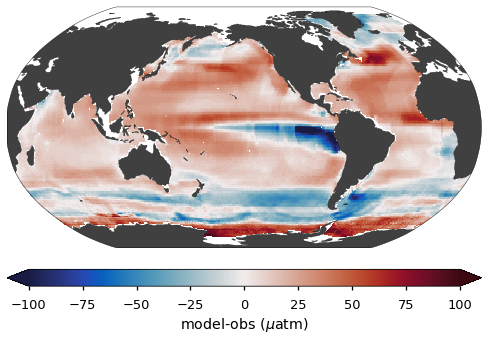

<Figure size 3120x2145 with 0 Axes>

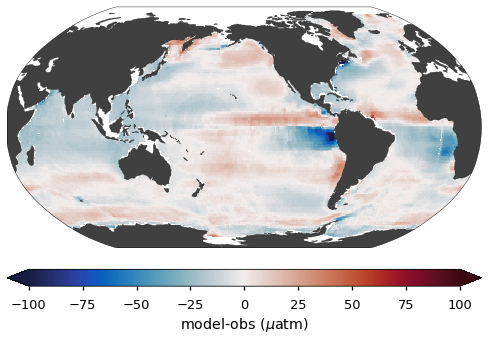

In [9]:
from itertools import product

## colorbar [min, max, step]
vrange = [-100, 100, 10]
cmap = cm.cm.balance

#  list of season and models to loop over
seasons = ['DJF', 'MAM', 'JJA', 'SON']
models = ['mpi', 'cnrm']

# this loop is equivalent to a nested-for-loop
for season, model in product(seasons,models):
    with plt.style.context('seaborn-talk'):
        np.seterr(divide='ignore', invalid='ignore')
        fig = plt.figure(dpi=300)  
        dia = SpatialMap(nrows_ncols=(1,1), cbar_location='bottom', cbar_orientation='horizontal', colorbar=True)

        # Loop over models
        ax=0
        #for model in np.arange(0,9):
        #model='mpi' #MPI
        #season='DJF'
        # Loop over seasons
        #for season in ['DJF', 'MAM', 'JJA', 'SON']:
        data = ds['error'].sel(model=model).groupby('time.season').mean('time').sel(season=season)
        sub = dia.add_plot(lat = data['lat'], 
                           lon = data['lon'], 
                           data = data, 
                           vrange=vrange[0:2], 
                           cmap=cmap, 
                           ax=ax)
        # Update axis
        #ax=ax+1

        cbar = dia.add_colorbar(sub, extend='both')
        cbar.ax.set_xlabel(f'model-obs ($\mu$atm)')
        #plt.pcolor(ds_out['lon'], ds['lat'], ds_out['spco2'].mean('time'), vmin=280, vmax=440, cmap=cm.cm.thermal)
        #plt.colorbar()

        #plt.savefig(f'{dir_figs}/misfit_{model}_{season}.pdf',
        #            dpi=300,
        #            transparent = True, 
        #            bbox_inches = 'tight', 
        #            pad_inches = 0)

# Seasonal map of error
all models

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<Figure size 3120x2145 with 0 Axes>

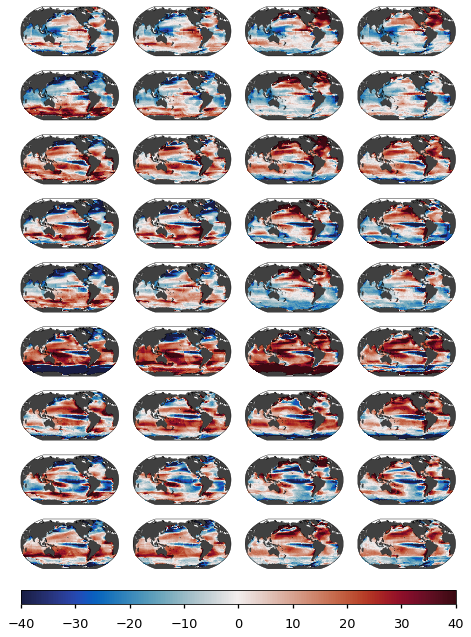

In [82]:
## colorbar [min, max, step]
vrange = [-40, 40, 5]
cmap = cm.cm.balance

with plt.style.context('seaborn-talk'):
    np.seterr(divide='ignore', invalid='ignore')
    fig = plt.figure(dpi=300)  
    dia = SpatialMap(nrows_ncols=(9,4), cbar_location='bottom', cbar_orientation='horizontal')
    
    # Loop over models
    ax=0
    for model in list(ds.model.values):
        # Loop over seasons
        for season in ['DJF', 'MAM', 'JJA', 'SON']:
            data = ds['error'].sel(model=model).groupby('time.season').mean('time').sel(season=season)
            sub = dia.add_plot(lat = data['lat'], 
                               lon = data['lon'], 
                               data = data, 
                               vrange=vrange[0:2], 
                               cmap=cmap, 
                               ax=ax)
            # Update axis
            ax=ax+1

    dia.add_colorbar(sub)
    #plt.pcolor(ds_out['lon'], ds['lat'], ds_out['spco2'].mean('time'), vmin=280, vmax=440, cmap=cm.cm.thermal)
    #plt.colorbar()